<a href="https://colab.research.google.com/github/YuliaCherniakova/machine_learning/blob/main/ARIMA_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 43.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('/content/drive/MyDrive/HospitalityEmployees.csv',delimiter=',')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [ ]:
df['Date']=pd.to_datetime(df['Date'],format="%m/%d/%Y")
df.set_index('Date',inplace=True)
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


[Text(0, 0.5, ' '), Text(0.5, 0, 'Date')]

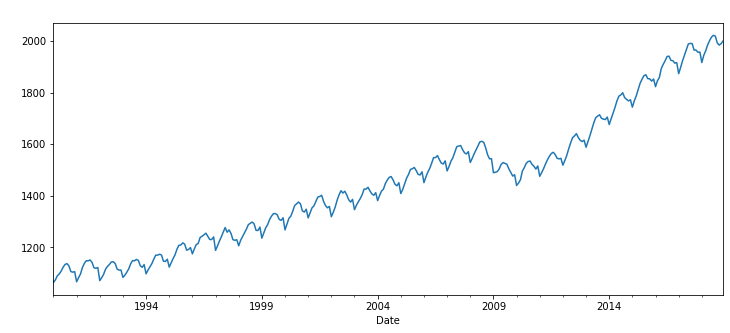

In [ ]:
#a)
xtitle=' '
ylabel=' '
xlabel='Date'

a=df['Employees'].plot(figsize=(12,5), title=xtitle)
a.autoscale(axis='x',tight=True)
a.set(ylabel=ylabel, xlabel=xlabel)

[Text(0, 0.5, 'Thousands of persons'), Text(0.5, 0, 'Date')]

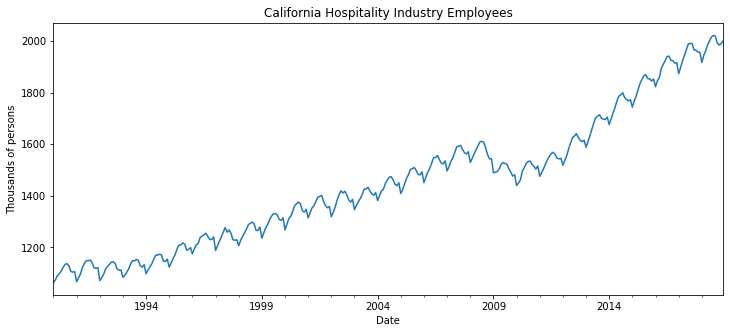

In [ ]:
#b)
xtitle='California Hospitality Industry Employees'
ylabel='Thousands of persons'
xlabel='Date'

a=df['Employees'].plot(figsize=(12,5), title=xtitle)
a.autoscale(axis='x',tight=True)
a.set(ylabel=ylabel, xlabel=xlabel)

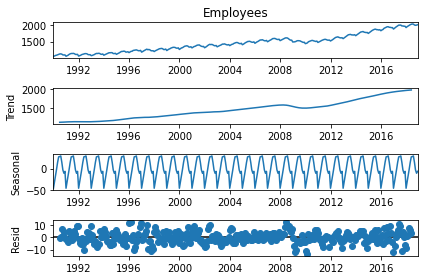

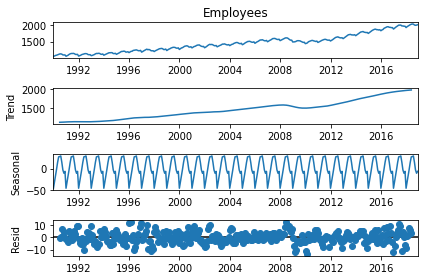

In [ ]:
#c)
result=seasonal_decompose(df['Employees'], model='additive')
result.plot()

In [ ]:
#d)
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 25 Dec 2022   AIC                           2208.504
Time:                                      09:39:13   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.527      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.551      0.000      -1.080      -0.807
ma.L2          0.1288      0.060      2.153      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    699.136      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.313      0.000      -0.834      -0.664
sigma2        29.2992      1.717     17.068      0.000      25.935      32.664
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#e)
#f)
train=df.iloc[:336]
test=df.iloc[336:]

model=SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 25 Dec 2022   AIC                           2128.116
Time:                                      09:39:29   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.284      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.607      0.000      -1.096      -0.820
ma.L2          0.1498      0.061      2.446      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    730.763      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.151      0.000      -0.838      -0.666
sigma2        28.7643      1.684     17.079      0.000      25.463      32.065
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#g)
xstart=len(train)
xend=len(train)+len(test)-1

prediction=results.predict(start=xstart, end=xend, dynamic=False, typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

for i in range(len(prediction)):
  print(f"predicted={prediction[i]:<11.10}, expected={test['Employees'][i]}")




predicted=1922.287887, expected=1916.8
predicted=1941.848546, expected=1944.5
predicted=1959.858266, expected=1962.2
predicted=1983.209795, expected=1984.9
predicted=2002.915889, expected=2001.5
predicted=2019.448758, expected=2015.3
predicted=2026.313867, expected=2022.1
predicted=2028.254929, expected=2019.1
predicted=2009.874299, expected=1992.5
predicted=2004.782517, expected=1984.3
predicted=1996.729897, expected=1990.1
predicted=2000.532804, expected=2000.2


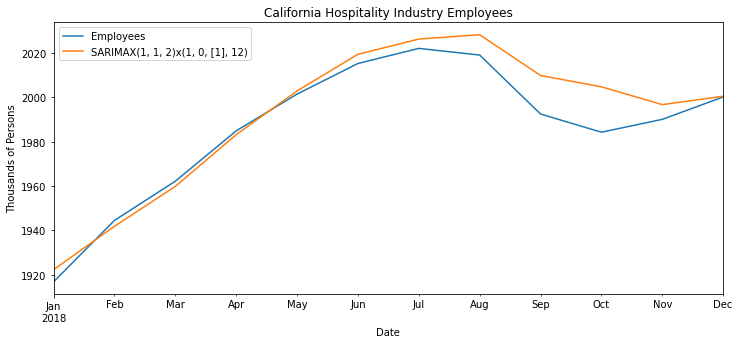

In [ ]:
#g)
xtitle='California Hospitality Industry Employees'
xlabel='Date'
ylabel='Thousands of Persons'
a=test['Employees'].plot(figsize=(12,5), legend=True, title=xtitle)
prediction.plot(legend=True)

a.autoscale(axis='x', tight=True)
a.set(xlabel=xlabel, ylabel=ylabel)
a.legend(loc='upper left', bbox_to_anchor=(0,1))

In [ ]:
#h)
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

error1=mean_squared_error(test['Employees'], prediction)
error2=rmse(test['Employees'], prediction)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error:{error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error:{error2:11.10}')



SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error:77.64500379
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error:8.811640244


In [ ]:
#i)
auto_arima(df['Employees'],seasonal=True,m=12).summary()

model=SARIMAX(df['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results=model.fit()

fcast=results.predict(len(df)-1, len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

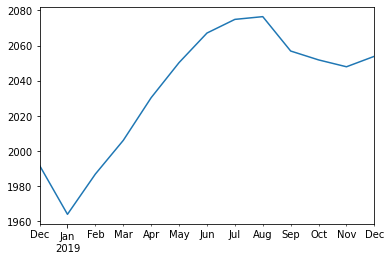

In [ ]:
#j)

fcast.plot()

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, 'Date')]

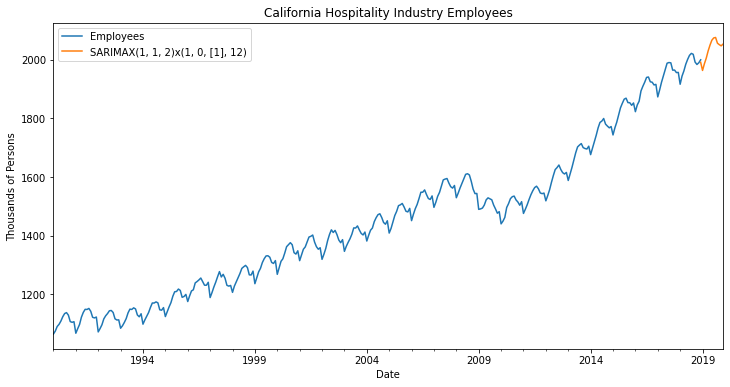

In [ ]:
#k)
xtitle='California Hospitality Industry Employees'
xlabel='Date'
ylabel='Thousands of Persons'

a=df['Employees'].plot( figsize=(12,6), legend=True, title=xtitle)
fcast.plot(legend=True)
a.autoscale(axis='x', tight=True)
a.set(xlabel=xlabel, ylabel=ylabel)